**Imports**

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

**Load Image**

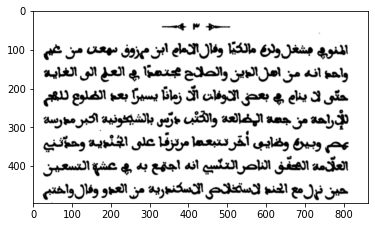

In [39]:
imagefile = "exemple.png"
image = cv2.imread(imagefile)
plt.imshow(image, cmap='gray')
plt.show()

**Line Segmentation**

In [33]:
def line_segmentation(image):
    line_segments = []
    # convert image to grascale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
    
    # image dilation
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((5,100), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=1)
    
    # Get the Contour
    contours, hierarchy = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the Region Of Interest
    sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    for i, ctr in enumerate(sorted_contours):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)

        roi = image[y:y+h, x:x+w]
        
        line_segments.append(roi)
        
    return line_segments

In [ ]:
lines = line_segmentation(image)

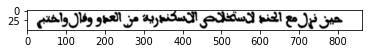

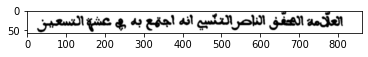

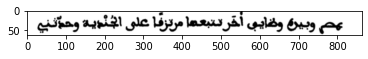

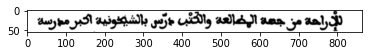

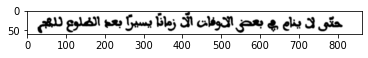

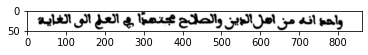

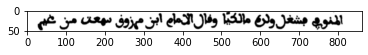

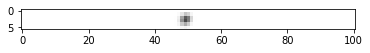

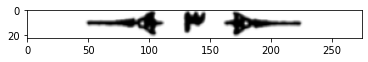

In [71]:
for line in lines:
    plt.imshow(line)
    plt.show()

**Word Segmentation**

In [72]:
def shear(img, m=-0.5):
    width, height = img.size
    xshift = abs(m)*width/20
    new_width = width + int(round(xshift))
    img = img.transform((new_width, height), Image.AFFINE,
            (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)
    return(np.array(img)[:, 20:-20])

def word_segmentation(segment):
    words = []
    # color the image
    image_proportion = cv2.cvtColor(segment, cv2.COLOR_RGB2GRAY)
    
    # shear the image
    image_proportion = shear(Image.fromarray(image_proportion), -0.3)
    
    # get the interruption between the words
    hist = 255-image_proportion.mean(axis=0)
    interruption = hist > 20
    
    # separate between the words
    mask = image_proportion * interruption
    fg = cv2.bitwise_or(image_proportion, image_proportion, mask=mask)
    
    # detect the contour 
    contours, hierarchy = cv2.findContours(fg.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    for i, ctr in enumerate(sorted_contours):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)

        # Getting ROI
        roi = fg[y:y+h, x:x+w]
        
        words.append(roi)
        
    return words
    
    

    

In [74]:
segment = lines[0]
words = word_segmentation(segment)

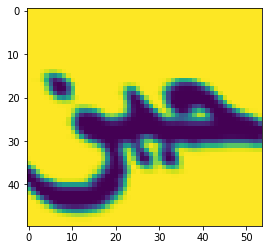

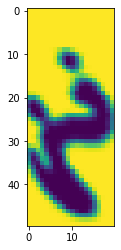

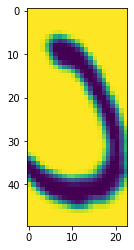

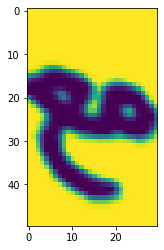

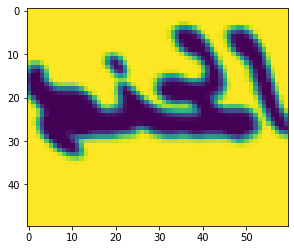

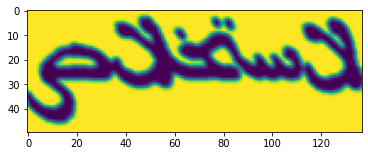

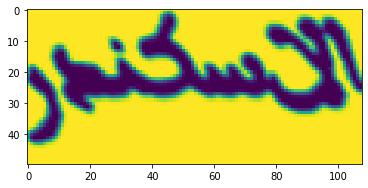

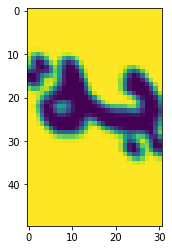

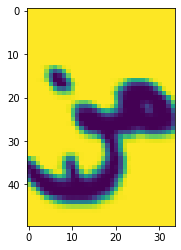

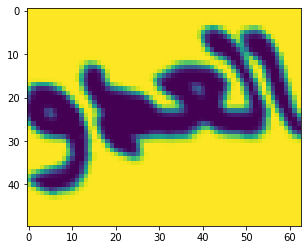

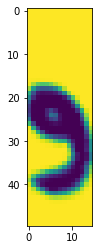

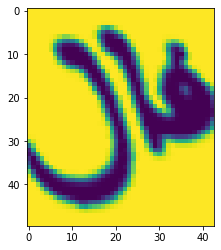

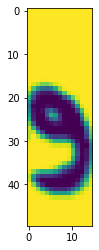

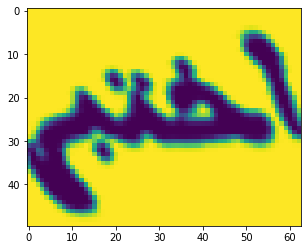

In [76]:
for word in words[::-1]:
    plt.imshow(word)
    plt.show()